## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('amazon_toys.csv')
df.head()

,img_data,img_link,link,name,num_ratings,price,stars
0,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/ORWINE-Educational-Fric...,ORWINE Inertia Toy Early Educational Toddler B...,99.0,16.99,4.8 out of 5 stars
1,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Melissa-Doug-Flip-Fish-...,"Melissa & Doug Flip Fish Baby Toy, Development...",243.0,14.99,4.8 out of 5 stars
2,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/TYRY-HU-Pacifier-Silico...,TYRY.HU Pacifier Clips Silicone Teething Beads...,209.0,13.99,4.1 out of 5 stars
3,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Patrol-Ultimate-Rescue-...,PAW Patrol Ultimate Rescue Chase's Mini Helico...,45.0,7.29,4.8 out of 5 stars
4,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Skip-Hop-Explore-Follow...,Skip Hop Explore & More Follow-Me Bee Crawl To...,131.0,23.49,4.5 out of 5 stars


We first look at ratings, and numbers of raters. We convert rating column to numerics. And then plot histogram to look at its distribution.
Notice that the 'num_ratings' column is not on the proper scale, we log it.

Further, we are curious about the correlation between ratings and numbers of rating. So scatter plot is suitable. However, a number of items rated only few times, which makes the dataset bias towards high number of ratings, so we apply Laplace smoothing.

This Laplace smoothing is like Bayesian prespective: prior rating is each item rates median 2.5, and then add information of whole dataset to form posterior rating.

In [9]:
df['ratings'] = df['stars'].apply(lambda x: float(x.split()[0]))

In [14]:
df.shape

(904, 8)

(array([  0.,   0.,   0.,   0.,   0.,  24.,   1.,   0.,   0.,   2.,   6.,
          3.,   0.,   8.,   7.,  37.,  41.,  30.,  82.,  34., 108.,  89.,
        179.,  77., 176.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 25 Patch objects>)

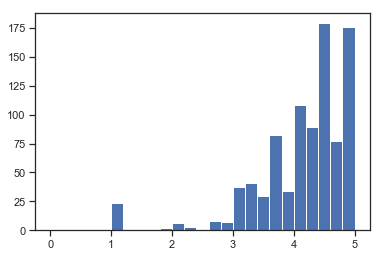

In [34]:
plt.hist(df['ratings'], range=[0,5], bins=25)

(array([100.,   0.,  77.,  50.,  43.,  77.,  58.,  54.,  57.,  63.,  44.,
         45.,  41.,  34.,  41.,  22.,  28.,  25.,  16.,  11.,   8.,   6.,
          1.,   2.,   1.]),
 array([0.        , 0.13233404, 0.26466808, 0.39700211, 0.52933615,
        0.66167019, 0.79400423, 0.92633827, 1.0586723 , 1.19100634,
        1.32334038, 1.45567442, 1.58800846, 1.72034249, 1.85267653,
        1.98501057, 2.11734461, 2.24967865, 2.38201268, 2.51434672,
        2.64668076, 2.7790148 , 2.91134883, 3.04368287, 3.17601691,
        3.30835095]),
 <a list of 25 Patch objects>)

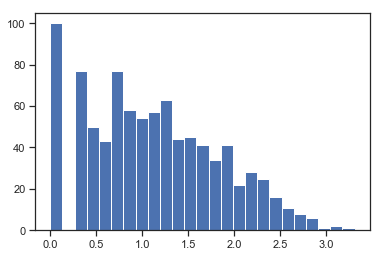

In [33]:
plt.hist(np.log10(df['num_ratings']), bins=25)

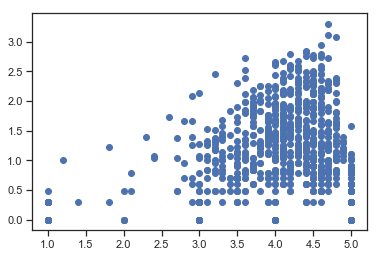

In [31]:
plt.scatter(df['ratings'], np.log10(df['num_ratings']))

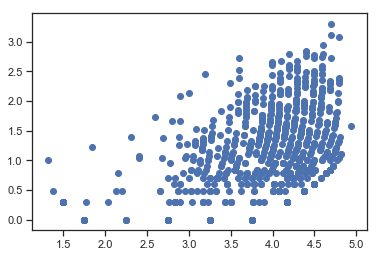

In [36]:
# Laplace smoothing
df['bayes_ratings'] = (df['ratings']*df['num_ratings'] + 2.5)/(df['num_ratings'] + 1)
plt.scatter(df['bayes_ratings'], np.log10(df['num_ratings']))

(array([  1.,   2.,   2.,  10.,  29.,  34.,  47.,  53., 102.,  76., 105.,
        103.,  50.,  72.,  55.,  53.,  38.,  14.,  16.,   7.,   6.,   5.,
          6.,   4.,   4.,   3.,   3.,   3.,   0.,   1.]),
 array([1.15373159, 1.28964237, 1.42555316, 1.56146394, 1.69737473,
        1.83328551, 1.9691963 , 2.10510708, 2.24101787, 2.37692865,
        2.51283944, 2.64875022, 2.78466101, 2.92057179, 3.05648258,
        3.19239336, 3.32830415, 3.46421493, 3.60012572, 3.7360365 ,
        3.87194729, 4.00785807, 4.14376886, 4.27967964, 4.41559043,
        4.55150121, 4.687412  , 4.82332278, 4.95923357, 5.09514435,
        5.23105514]),
 <a list of 30 Patch objects>)

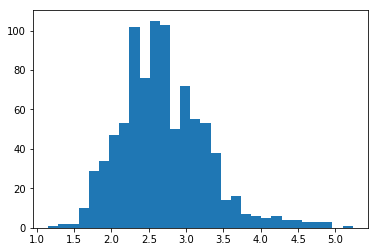

In [22]:
plt.hist(np.log(df['price']), bins=30)

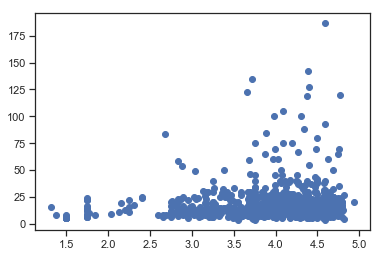

In [40]:
plt.scatter(df['bayes_ratings'], df['price'])


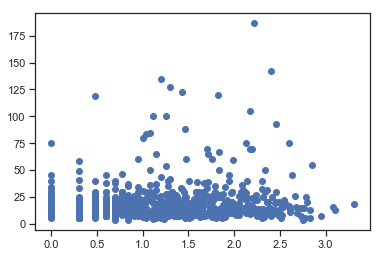

In [41]:
plt.scatter(np.log10(df['num_ratings']), df['price'])

The distribution of price after log transform looksquite normal.And there is no other correlations between price and other variables.